<a href="https://colab.research.google.com/github/7atemAlawwad/T5/blob/main/Task_(2)_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objective
* The objective of this exercise is to explore and visualize the Traffic Index dataset to gain insights and understand the patterns in the data.

##Dataset Description

| Column Name | Description | Data Type |
| :---------------- | :------: | ----: |
|   City  |   Name of the city	   | Object |
| Datetime           |   Date and time of the data entry	   | Object |
|  TrafficIndexLive    |  Real-time traffic index	   | Int |
|  Jamscount |  Number of traffic jams	   | Int |
|   JamsDelay  |   Total delay caused by traffic jams (in minutes)	   | Float |
|JamsLength           |   Total length of traffic jams (in kilometers)	   | Float |
|  TrafficIndexWeekAgo    |  Traffic index one week ago	   | Int |
|  TravelTimeHistoric |  Historical average travel time (in minutes)	   | Float |
|   TravelTimeLive  |   Real-time travel time (in minutes)	   | Float |


# Tasks

## 1. Exploratory Data Analysis (EDA)

### Perform summary statistics on the dataset.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [67]:
df = pd.read_csv('/content/Task (2) Dataset.csv')
df

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
0,Abudhabi,2023-07-07 08:01:30,6,4,15.6,0.7,13,59.611918,54.803617
1,Abudhabi,2023-07-07 09:01:30,7,7,20.5,1.7,8,60.221387,56.118629
2,Abudhabi,2023-07-07 10:46:30,7,8,25.0,2.8,6,59.161978,55.518834
3,Abudhabi,2023-07-07 11:16:30,8,11,30.6,5.5,6,59.738138,56.413917
4,Abudhabi,2023-07-07 12:01:30,8,20,62.1,6.5,5,58.958314,56.059246
...,...,...,...,...,...,...,...,...,...
66634,Riyadh,2023-12-15 03:01:30,8,33,127.8,20.4,8,63.926569,63.245473
66635,Riyadh,2023-12-15 04:31:30,6,27,87.0,13.8,5,59.182641,60.012955
66636,Riyadh,2023-12-15 05:01:30,3,17,49.8,6.7,1,57.746816,57.561438
66637,Riyadh,2023-12-15 06:01:30,0,16,61.3,4.3,0,56.535277,55.463218


In [68]:
df.describe()

,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
count,66639.000000,66639.000000,66639.000000,66639.000000,66639.000000,62772.000000,62772.000000
mean,14.043113,74.278531,288.353877,49.316135,13.981737,70.706601,70.048451
std,13.488906,107.452022,470.013224,85.352525,13.454922,10.588384,11.966725
min,0.000000,0.000000,0.000000,0.000000,0.000000,49.381346,46.723235
25%,3.000000,9.000000,27.700000,3.000000,3.000000,63.142591,60.712805
50%,10.000000,29.000000,95.700000,12.200000,10.000000,68.894790,68.247303
75%,21.000000,95.000000,336.600000,53.500000,21.000000,76.250975,77.043739
max,138.000000,1359.000000,9989.400000,1173.900000,138.000000,120.140593,134.484139


### Identify and analyze patterns in the data.

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66639 entries, 0 to 66638
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 66639 non-null  object 
 1   Datetime             66639 non-null  object 
 2   TrafficIndexLive     66639 non-null  int64  
 3   JamsCount            66639 non-null  int64  
 4   JamsDelay            66639 non-null  float64
 5   JamsLength           66639 non-null  float64
 6   TrafficIndexWeekAgo  66639 non-null  int64  
 7   TravelTimeHistoric   62772 non-null  float64
 8   TravelTimeLive       62772 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 4.6+ MB


In [70]:
df.isnull().sum()

City                      0
Datetime                  0
TrafficIndexLive          0
JamsCount                 0
JamsDelay                 0
JamsLength                0
TrafficIndexWeekAgo       0
TravelTimeHistoric     3867
TravelTimeLive         3867
dtype: int64

In [71]:
df['TravelTimeHistoric'].fillna(df['TravelTimeHistoric'].mean(), inplace=True)
df['TravelTimeLive'].fillna(df['TravelTimeLive'].mean(), inplace=True)

df.isnull().sum()

City                   0
Datetime               0
TrafficIndexLive       0
JamsCount              0
JamsDelay              0
JamsLength             0
TrafficIndexWeekAgo    0
TravelTimeHistoric     0
TravelTimeLive         0
dtype: int64

### Visualize the distribution of key variables (e.g., Traffic_Index, Date).

In [72]:
cols_to_scale = ['TrafficIndexLive', 'JamsCount', 'JamsDelay', 'JamsLength', 'TrafficIndexWeekAgo', 'TravelTimeHistoric', 'TravelTimeLive']
scaler = preprocessing.MinMaxScaler()

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

df

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
0,Abudhabi,2023-07-07 08:01:30,0.043478,0.002943,0.001562,0.000596,0.094203,0.144583,0.092073
1,Abudhabi,2023-07-07 09:01:30,0.050725,0.005151,0.002052,0.001448,0.057971,0.153196,0.107057
2,Abudhabi,2023-07-07 10:46:30,0.050725,0.005887,0.002503,0.002385,0.043478,0.138224,0.100222
3,Abudhabi,2023-07-07 11:16:30,0.057971,0.008094,0.003063,0.004685,0.043478,0.146367,0.110421
4,Abudhabi,2023-07-07 12:01:30,0.057971,0.014717,0.006217,0.005537,0.036232,0.135346,0.106380
...,...,...,...,...,...,...,...,...,...
66634,Riyadh,2023-12-15 03:01:30,0.057971,0.024283,0.012794,0.017378,0.057971,0.205559,0.188264
66635,Riyadh,2023-12-15 04:31:30,0.043478,0.019868,0.008709,0.011756,0.036232,0.138516,0.151431
66636,Riyadh,2023-12-15 05:01:30,0.021739,0.012509,0.004985,0.005707,0.007246,0.118224,0.123497
66637,Riyadh,2023-12-15 06:01:30,0.000000,0.011773,0.006137,0.003663,0.000000,0.101102,0.099589


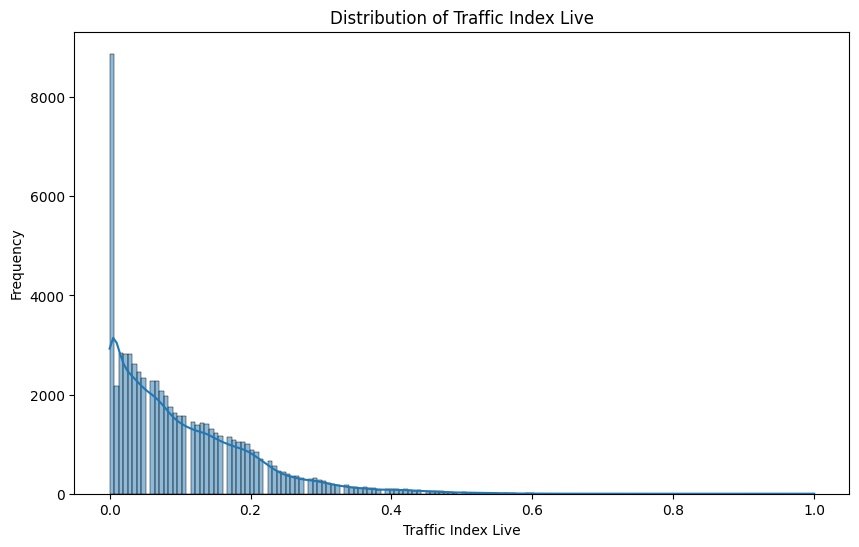

In [73]:
plt.figure(figsize=(10, 6))
sns.histplot(df['TrafficIndexLive'], kde=True)
plt.title('Distribution of Traffic Index Live')
plt.xlabel('Traffic Index Live')
plt.ylabel('Frequency')
plt.show()

df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Date'] = df['Datetime'].dt.date

### Explore relationships between variables (e.g., Traffic_Index vs. Weather_Condition).


In [74]:
pd.crosstab(df['City'], df['TrafficIndexLive'])


TrafficIndexLive,0.000000,0.007246,0.014493,0.021739,0.028986,0.036232,0.043478,0.050725,0.057971,0.065217,...,0.688406,0.695652,0.710145,0.717391,0.753623,0.768116,0.775362,0.833333,0.985507,1.000000
City,,,,,,,,,,,,,,,,,,,,,
Abudhabi,3,49,184,283,270,174,178,227,230,250,...,0,0,0,0,0,0,0,0,0,0
Al-ain,159,274,417,288,247,207,164,215,235,192,...,0,0,0,0,0,0,0,0,0,0
Cairo,3784,186,202,232,260,286,294,238,216,236,...,0,0,0,0,0,0,0,0,0,0
Dammam,202,200,206,186,174,169,134,102,153,212,...,0,0,0,0,0,0,0,0,0,0
Doha,14,69,142,153,231,263,286,308,378,366,...,0,0,0,0,0,0,0,0,0,0
Dubai,28,74,221,232,312,449,333,270,206,189,...,0,0,2,0,1,1,1,1,1,1
Jeddah,620,138,138,131,153,108,105,97,84,92,...,0,0,0,0,0,0,0,0,0,0
Kuwait,48,311,583,706,571,391,377,328,299,289,...,0,0,0,0,0,0,0,0,0,0
Mecca,1980,219,161,149,183,152,173,186,143,161,...,0,0,0,0,0,0,0,0,0,0


## 2. Data Visualization

* Ensure the visualizations are clear and informative.

### Create visualizations to illustrate the findings from the EDA.


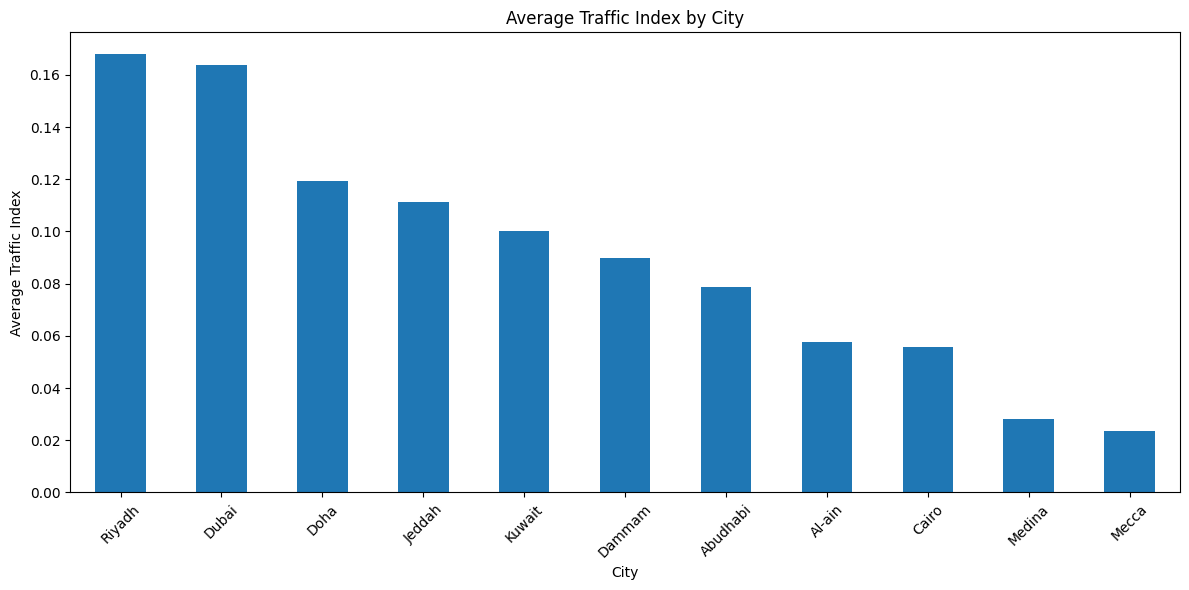

In [75]:
city_traffic = df.groupby('City')['TrafficIndexLive'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
city_traffic.plot(kind='bar')
plt.title('Average Traffic Index by City')
plt.xlabel('City')
plt.ylabel('Average Traffic Index')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

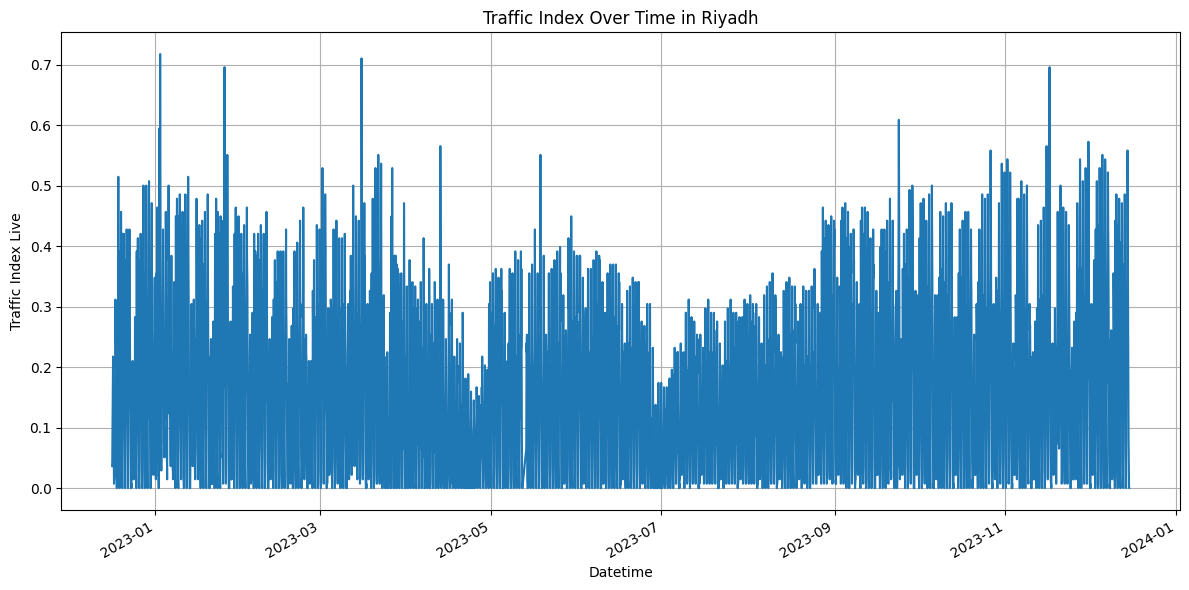

In [76]:
los_angeles_traffic = df[df['City'] == 'Riyadh'].set_index('Datetime')['TrafficIndexLive']
plt.figure(figsize=(12, 6))
los_angeles_traffic.plot()
plt.title('Traffic Index Over Time in Riyadh')
plt.xlabel('Datetime')
plt.ylabel('Traffic Index Live')
plt.grid(True)
plt.tight_layout()
plt.show()

### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

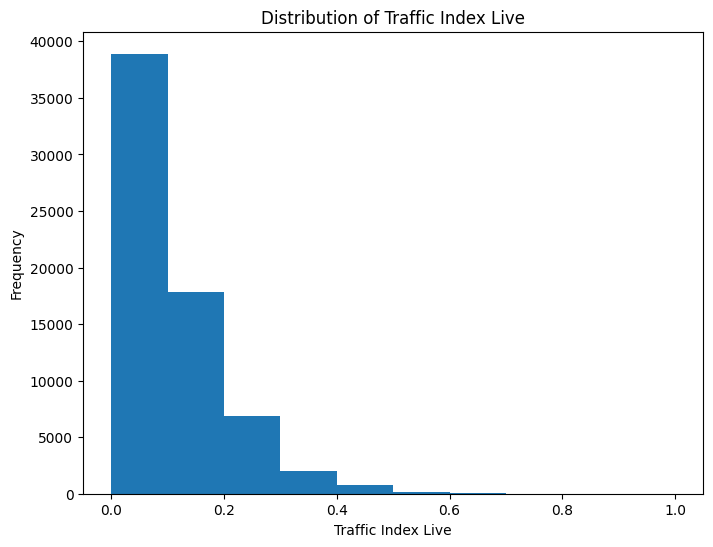

In [77]:
plt.figure(figsize=(8, 6))
plt.hist(df['TrafficIndexLive'])
plt.xlabel('Traffic Index Live')
plt.ylabel('Frequency')
plt.title('Distribution of Traffic Index Live')
plt.show()

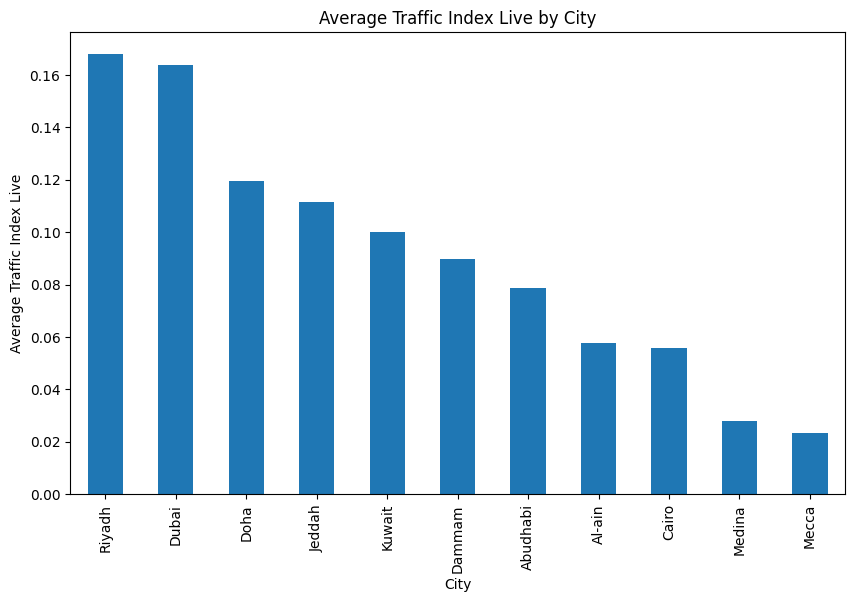

In [78]:
city_avg_traffic = df.groupby('City')['TrafficIndexLive'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
city_avg_traffic.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Average Traffic Index Live')
plt.title('Average Traffic Index Live by City')
plt.show()

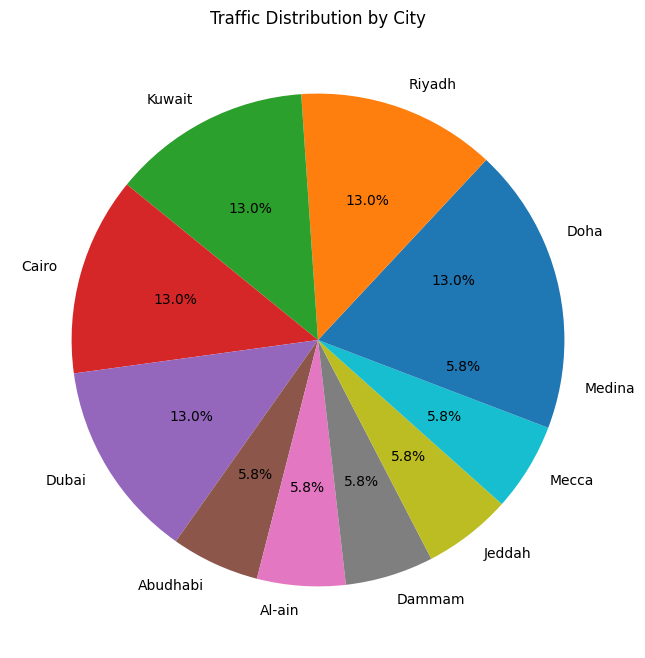

In [79]:
city_traffic_counts = df['City'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(city_traffic_counts, labels=city_traffic_counts.index, autopct='%1.1f%%')
plt.title('Traffic Distribution by City')
plt.show()

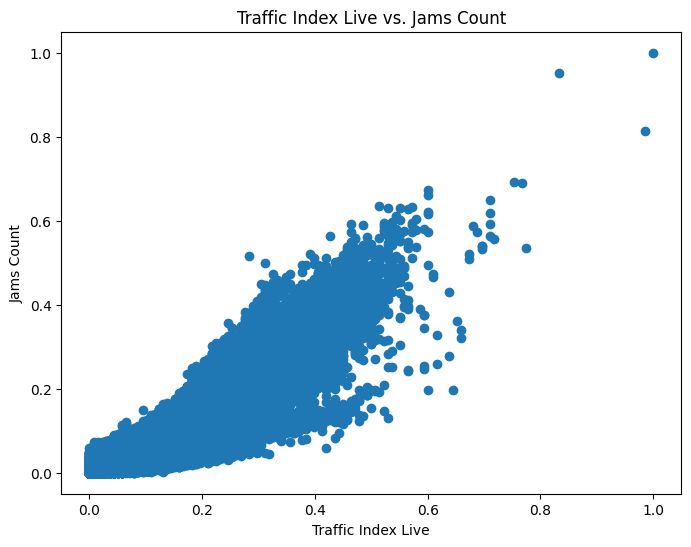

In [80]:
plt.figure(figsize=(8, 6))
plt.scatter(df['TrafficIndexLive'], df['JamsCount'])
plt.xlabel('Traffic Index Live')
plt.ylabel('Jams Count')
plt.title('Traffic Index Live vs. Jams Count')
plt.show()

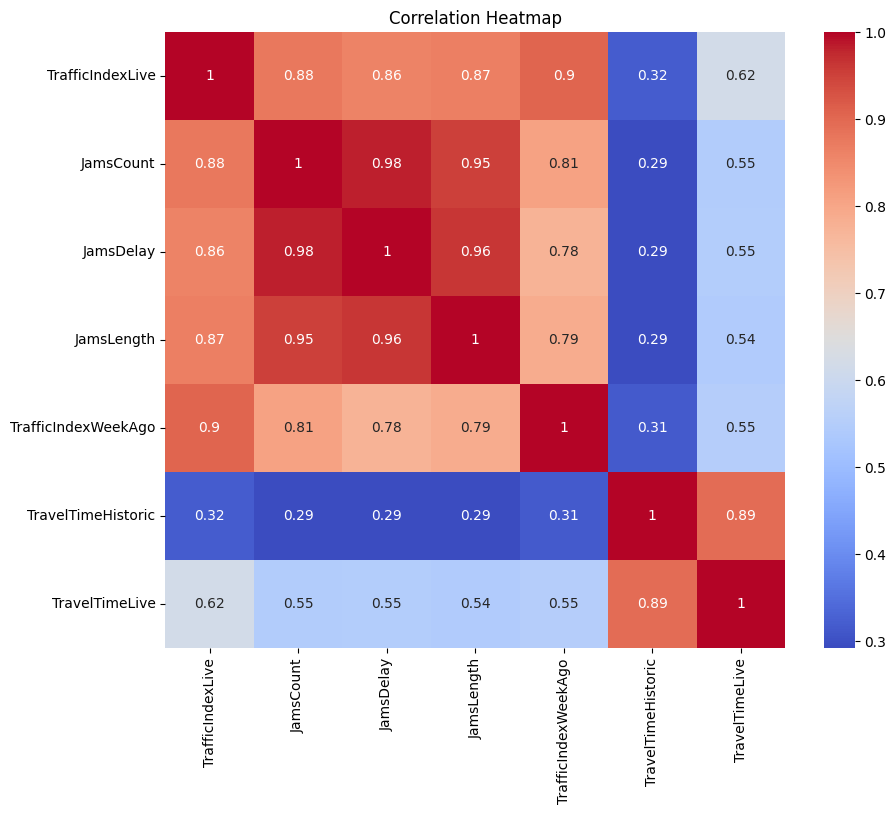

In [81]:
corr_matrix = df[['TrafficIndexLive', 'JamsCount', 'JamsDelay', 'JamsLength', 'TrafficIndexWeekAgo', 'TravelTimeHistoric', 'TravelTimeLive']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(corr_matrix).T, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 3. Insights and Conclusions

* <h3>Summarize the key insights gained from the data analysis.<h3/>
* <h3>Draw conclusions based on the patterns observed in the data.<h3/>

In [82]:
#Riyadh experiences the highest traffic congestion
#Traffic congestion is correlated with the number and length of traffic jams
#Traffic patterns change over time and by city